In [1]:
!pip install kaggle

In [2]:
!kaggle datasets download -d rohit265/loan-approval-dataset

Dataset URL: https://www.kaggle.com/datasets/rohit265/loan-approval-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
 46% 5.00M/11.0M [00:00<00:00, 44.8MB/s]
100% 11.0M/11.0M [00:00<00:00, 84.2MB/s]


In [3]:
!unzip loan-approval-dataset.zip


Archive:  loan-approval-dataset.zip
  inflating: loan_approval_dataset.json  


In [4]:
# Importing necessary libraries for the project
import numpy as np # linear algebra
import pandas as pd

In [5]:
import json

# Ruta del archivo JSON
archivo_json = 'loan_approval_dataset.json'

# Función para leer el archivo JSON
def leer_json(ruta):
    with open(ruta, 'r') as archivo:
        datos = json.load(archivo)
    return datos

# Llamada a la función para leer el archivo JSON
datos = leer_json(archivo_json)

## Revisión inicial
Inspecciona los primeros registros y los tipos de datos para entender la estructura del DataFrame:

In [6]:
# Convertir los datos a un DataFrame de Pandas
df = pd.DataFrame(datos)

# Mostrar los primeros 5 registros del DataFrame
print("Primeros 5 registros del DataFrame:")
print(df.head())


Primeros 5 registros del DataFrame:
   Id   Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   1  1303834   23           3         single          rented            no   
1   2  7574516   40          10         single          rented            no   
2   3  3991815   66           4        married          rented            no   
3   4  6256451   41           2         single          rented           yes   
4   5  5768871   47          11         single          rented            no   

            Profession                 CITY           STATE  CURRENT_JOB_YRS  \
0  Mechanical_engineer                 Rewa  Madhya_Pradesh                3   
1   Software_Developer             Parbhani     Maharashtra                9   
2     Technical_writer            Alappuzha          Kerala                4   
3   Software_Developer          Bhubaneswar          Odisha                2   
4        Civil_servant  Tiruchirappalli[10]      Tamil_Nadu                3   

  

In [7]:
# Mostrar información sobre los tipos de datos de cada columna
print("\nTipos de datos de cada columna:")
print(df.info())


Tipos de datos de cada columna:
<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB
None


## Tratamiento de valores nulos
Busca y maneja los valores nulos, ya que pueden afectar el análisis posterior:

### **Estrategias para manejar valores nulos:**
- Eliminación de filas/columnas con muchos valores nulos
- Imputación con la media/mediana/moda o métodos más sofisticados

df = df.dropna(subset=['column_name'])  # Para eliminar filas con valores nulos en una columna específica
df['column_name'] = df['column_name'].fillna(df['column_name'].mean())  # Para imputar valores nulos con la media

In [8]:
# Revisión de valores nulos
print(df.isnull().sum())

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64


## Manejo de datos duplicados
Elimina cualquier fila duplicada para evitar sesgos en el análisis:

In [9]:
# Identificación y eliminación de duplicados
print(df.duplicated().sum())
df = df.drop_duplicates()

0


## Convertir columnas a tipos de datos adecuados:

- Id: int64 (correcto)
- Income: int64 -> float (puede ser útil para cálculos precisos)
- Age: int64 (correcto)
- Experience: int64 (correcto)
- Married/Single: object -> category
- House_Ownership: object -> category
- Car_Ownership: object -> category
- Profession: object -> category
- CITY: object (correcto, aunque podríamos considerar estandarización)
- STATE: object (correcto, aunque podríamos considerar estandarización)
- CURRENT_JOB_YRS: int64 (correcto)
- CURRENT_HOUSE_YRS: int64 (correcto)
- Risk_Flag: int64 -> category (si es binario o categórico)

Este procedimiento asegura que cada columna en tu DataFrame tenga el tipo de dato más adecuado para análisis posteriores. Las conversiones a tipos categóricos para columnas como Married/Single, House_Ownership, Car_Ownership, Profession y Risk_Flag pueden mejorar la eficiencia y claridad de tus análisis, especialmente si usas modelos de machine learning o análisis estadísticos.

In [10]:
# Convertir Income a float
df['Income'] = df['Income'].astype(float)

# Convertir columnas categóricas
categorical_columns = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'Risk_Flag']
for col in categorical_columns:
    df[col] = df[col].astype('category')


# Verificar los cambios
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Id                 252000 non-null  int64   
 1   Income             252000 non-null  float64 
 2   Age                252000 non-null  int64   
 3   Experience         252000 non-null  int64   
 4   Married/Single     252000 non-null  category
 5   House_Ownership    252000 non-null  category
 6   Car_Ownership      252000 non-null  category
 7   Profession         252000 non-null  category
 8   CITY               252000 non-null  object  
 9   STATE              252000 non-null  object  
 10  CURRENT_JOB_YRS    252000 non-null  int64   
 11  CURRENT_HOUSE_YRS  252000 non-null  int64   
 12  Risk_Flag          252000 non-null  category
dtypes: category(5), float64(1), int64(5), object(2)
memory usage: 18.5+ MB
None
   Id     Income  Age  Experience Married/Single House_Ownershi

## Limpieza de datos categóricos
Normaliza los valores en columnas categóricas para asegurar consistencia:

In [11]:
# Normalización de valores categóricos
df['Married/Single'] = df['Married/Single'].str.lower().str.strip()
df['House_Ownership'] = df['House_Ownership'].str.lower().str.strip()
df['Car_Ownership'] = df['Car_Ownership'].str.lower().str.strip()
df['Profession'] = df['Profession'].str.replace('_', ' ').str.lower()
df['CITY'] = df['CITY'].str.replace(r'\[.*\]', '', regex=True).str.strip()
df['CITY'] = df['CITY'].str.replace('_', ' ').str.lower().str.strip()
df['STATE'] = df['STATE'].str.replace('_', ' ').str.lower().str.strip()

## Corrección de inconsistencias
Busca y corrige inconsistencias en los datos que puedan surgir de errores de entrada:

In [12]:
# Verificación de valores únicos para identificar inconsistencias
print(df['Married/Single'].unique())
print(df['House_Ownership'].unique())
print(df['Car_Ownership'].unique())
print(df['Profession'].unique())
print(df['CITY'].unique())
print(df['STATE'].unique())

['single' 'married']
['rented' 'norent_noown' 'owned']
['no' 'yes']
['mechanical engineer' 'software developer' 'technical writer'
 'civil servant' 'librarian' 'economist' 'flight attendant' 'architect'
 'designer' 'physician' 'financial analyst' 'air traffic controller'
 'politician' 'police officer' 'artist' 'surveyor' 'design engineer'
 'chemical engineer' 'hotel manager' 'dentist' 'comedian'
 'biomedical engineer' 'graphic designer' 'computer hardware engineer'
 'petroleum engineer' 'secretary' 'computer operator'
 'chartered accountant' 'technician' 'microbiologist' 'fashion designer'
 'aviator' 'psychologist' 'magistrate' 'lawyer' 'firefighter' 'engineer'
 'official' 'analyst' 'geologist' 'drafter' 'statistician' 'web designer'
 'consultant' 'chef' 'army officer' 'surgeon' 'scientist' 'civil engineer'
 'industrial engineer' 'technology specialist']
['rewa' 'parbhani' 'alappuzha' 'bhubaneswar' 'tiruchirappalli' 'jalgaon'
 'tiruppur' 'jamnagar' 'kota' 'karimnagar' 'hajipur' 'adoni'

# Identificación y Manejo de Outliers
Identificación de Outliers:

Utilizamos métodos estadísticos y visualización para identificar outliers en las columnas numéricas.

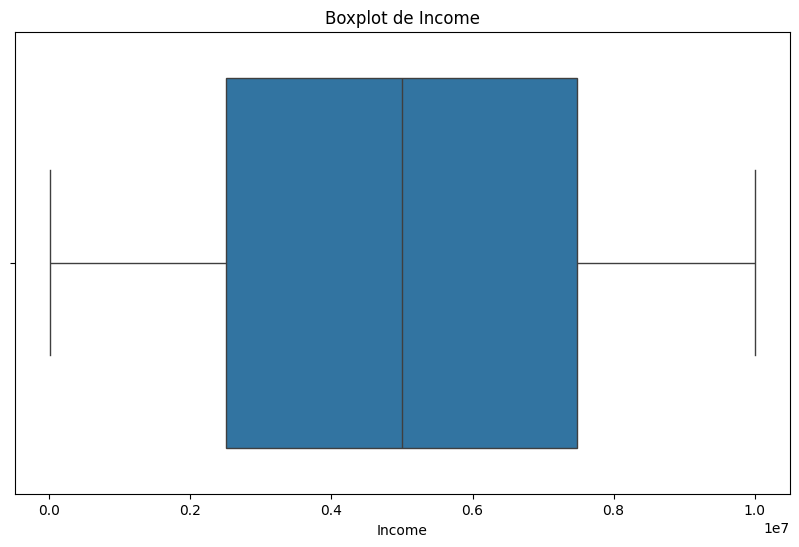

count    2.520000e+05
mean     4.997117e+06
std      2.878311e+06
min      1.031000e+04
25%      2.503015e+06
50%      5.000694e+06
75%      7.477502e+06
max      9.999938e+06
Name: Income, dtype: float64


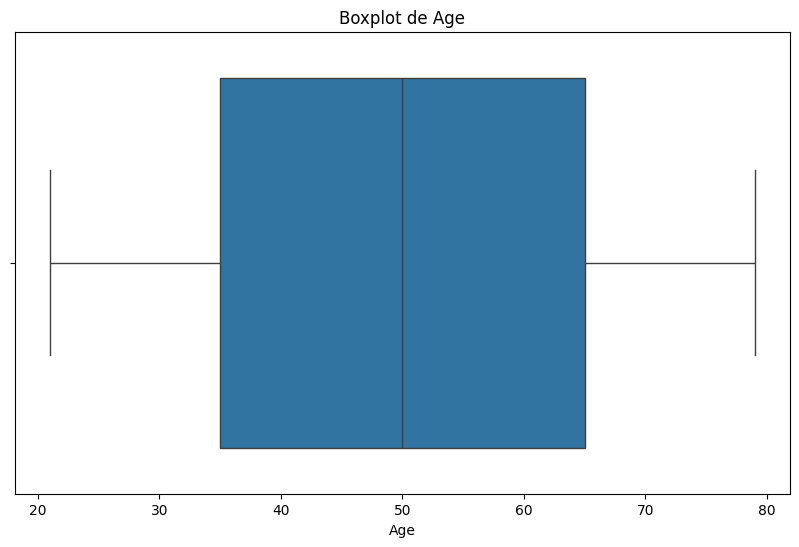

count    252000.000000
mean         49.954071
std          17.063855
min          21.000000
25%          35.000000
50%          50.000000
75%          65.000000
max          79.000000
Name: Age, dtype: float64


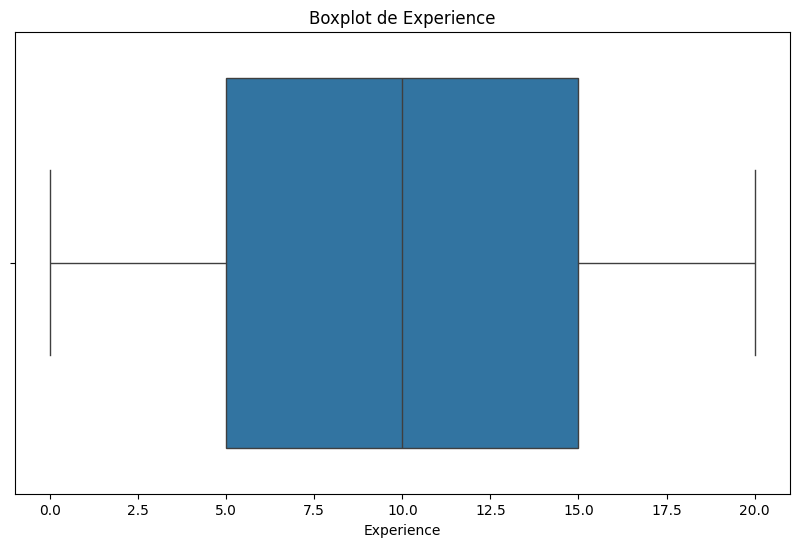

count    252000.000000
mean         10.084437
std           6.002590
min           0.000000
25%           5.000000
50%          10.000000
75%          15.000000
max          20.000000
Name: Experience, dtype: float64


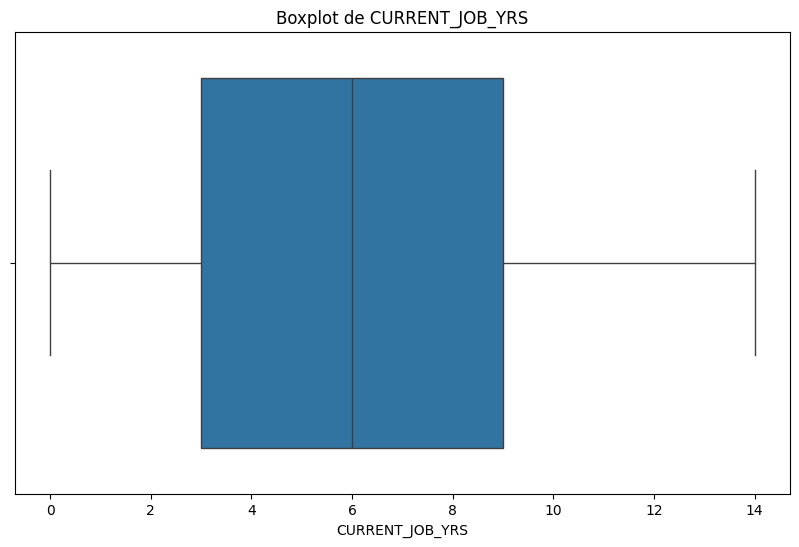

count    252000.000000
mean          6.333877
std           3.647053
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          14.000000
Name: CURRENT_JOB_YRS, dtype: float64


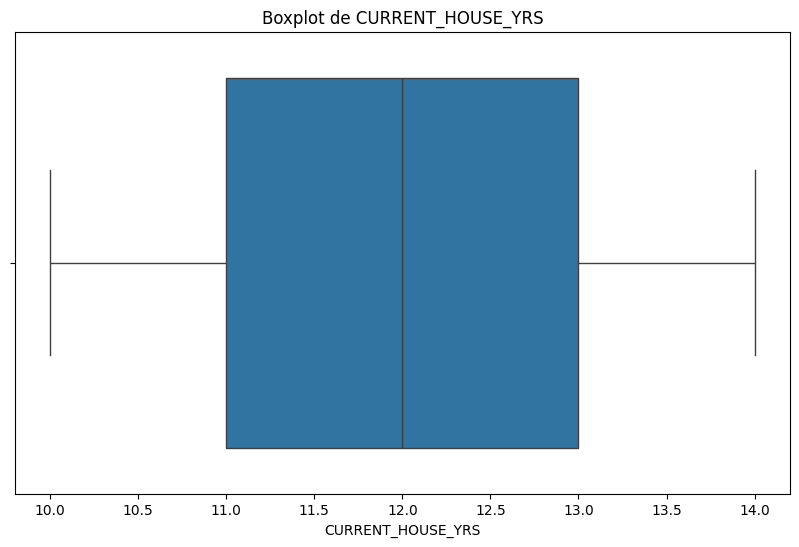

count    252000.000000
mean         11.997794
std           1.399037
min          10.000000
25%          11.000000
50%          12.000000
75%          13.000000
max          14.000000
Name: CURRENT_HOUSE_YRS, dtype: float64


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Cargar datos
# df = pd.read_csv('tu_archivo.csv')  # Carga tu DataFrame

# Identificación y visualización de outliers
numeric_columns = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()
    print(df[col].describe())

Como se puede visualizar no hay Outliers en los datos



## Transformación de Datos
Creación de Nuevas Variables:

Renta por Año de Experiencia:

In [14]:
# Crear una nueva columna: Ingreso por Año de Experiencia
df['Income_per_Year_of_Experience'] = df['Income'] / df['Experience']

### Edad al Comenzar el Trabajo:
Calcula la edad aproximada en la que una persona comenzó a trabajar.

In [15]:
df['Age_when_Started_Work'] = df['Age'] - df['Experience']

## Grupo de Edad:
Agrupa las edades en categorías.

In [16]:
bins = [0, 18, 25, 35, 45, 55, 65, np.inf]
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

## Categorías de Ingreso:
Crea categorías basadas en los rangos de ingresos.

In [17]:
income_bins = [0, 500000, 1000000, 5000000, 10000000, np.inf]
income_labels = ['Low', 'Lower-Middle', 'Middle', 'Upper-Middle', 'High']
df['Income_Category'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels)

## Interacción entre Posesión de Casa y Carro:
Combina información sobre la posesión de casa y carro para ver interacciones.

In [18]:
df['House_and_Car_Ownership'] = df['House_Ownership'].astype(str) + '_' + df['Car_Ownership'].astype(str)

## Tiempo en el Trabajo vs. en la Casa:
Diferencia entre los años en el trabajo actual y los años en la casa actual.

In [19]:
df['Job_vs_House_Years'] = df['CURRENT_JOB_YRS'] - df['CURRENT_HOUSE_YRS']

In [43]:
print(df.info())

print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Married/Single   5 non-null      object
 1   House_Ownership  5 non-null      object
 2   Car_Ownership    5 non-null      object
 3   Profession       5 non-null      object
 4   Age_Group        5 non-null      object
 5   Income_Category  5 non-null      object
dtypes: object(6)
memory usage: 368.0+ bytes
None
  Married/Single House_Ownership Car_Ownership Profession Age_Group  \
0        Married       Own house           Yes     Doctor     30-40   
1         Single            Rent            No    Teacher     20-30   
2        Married       Own house            No   Engineer     40-50   
3         Single            Rent           Yes    Teacher     20-30   
4         Single            Rent            No     Doctor     30-40   

  Income_Category  
0            High  
1             Low  
2  

## visualizar el comportamiento de los datos

Para visualizar el comportamiento de los datos en tu DataFrame, podemos utilizar diversas técnicas de visualización de datos. Utilizaremos librerías como matplotlib y seaborn para crear gráficos que nos permitan entender mejor las relaciones y distribuciones de los datos.

### Distribuciones de Variables Numéricas

Este gráfico proporciona una visión clara y directa de la cantidad de solicitantes clasificados como riesgosos y no riesgosos, facilitando la comprensión de la distribución del riesgo en el conjunto de datos.

<ipython-input-21-19eca36b9b18>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Risk_Flag', data=df, palette='coolwarm')


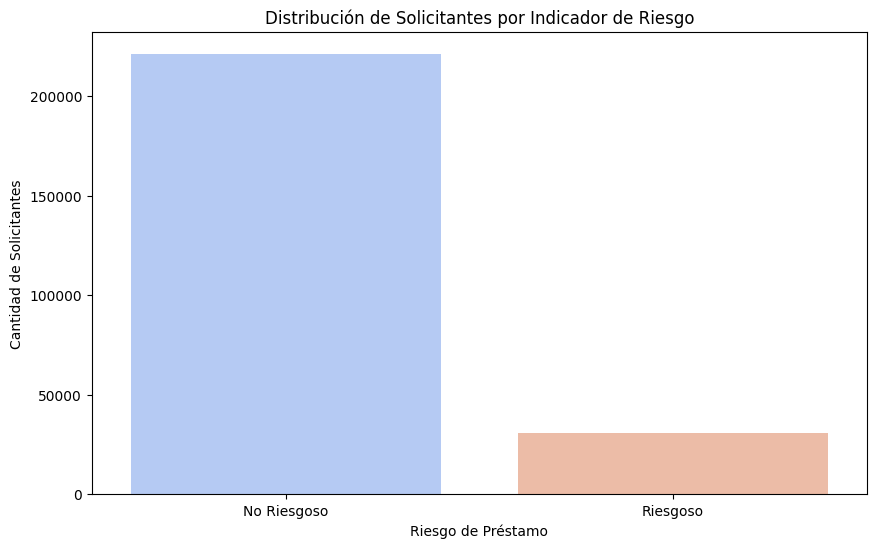

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras para visualizar Risk_Flag
plt.figure(figsize=(10, 6))
sns.countplot(x='Risk_Flag', data=df, palette='coolwarm')
plt.title('Distribución de Solicitantes por Indicador de Riesgo')
plt.xlabel('Riesgo de Préstamo')
plt.ylabel('Cantidad de Solicitantes')
plt.xticks([0, 1], ['No Riesgoso', 'Riesgoso'])
plt.show()


Distribución de Ingresos según Risk_Flag

<ipython-input-34-29a6c03c4bb2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Risk_Flag', y='Income', data=df, palette='coolwarm')


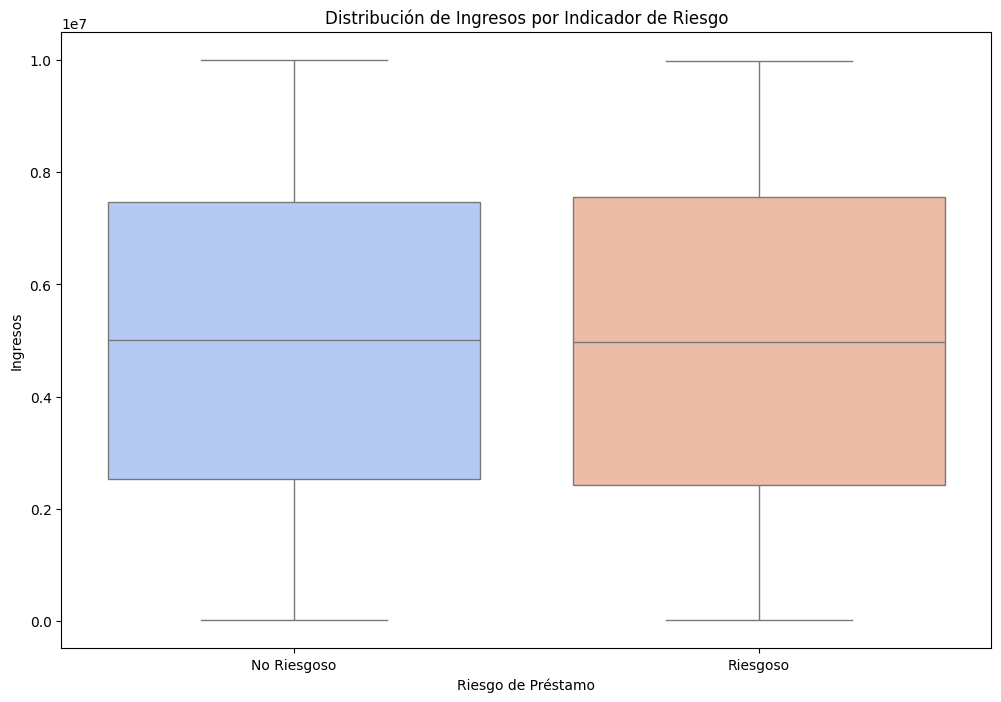

In [34]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Risk_Flag', y='Income', data=df, palette='coolwarm')
plt.title('Distribución de Ingresos por Indicador de Riesgo')
plt.xlabel('Riesgo de Préstamo')
plt.ylabel('Ingresos')
plt.xticks([0, 1], ['No Riesgoso', 'Riesgoso'])
plt.show()


El gráfico "Distribución de Ingresos por Indicador de Riesgo" proporciona evidencia de que el indicador de riesgo se asocia con los ingresos de los solicitantes de crédito. Los solicitantes "no riesgosos" tienen, en general, ingresos más altos y una distribución de ingresos más amplia que los solicitantes con "riesgosos".

Distribución de Años de Experiencia según Risk_Flag

<ipython-input-36-5a56f147c335>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Risk_Flag', y='Experience', data=df, palette='coolwarm')


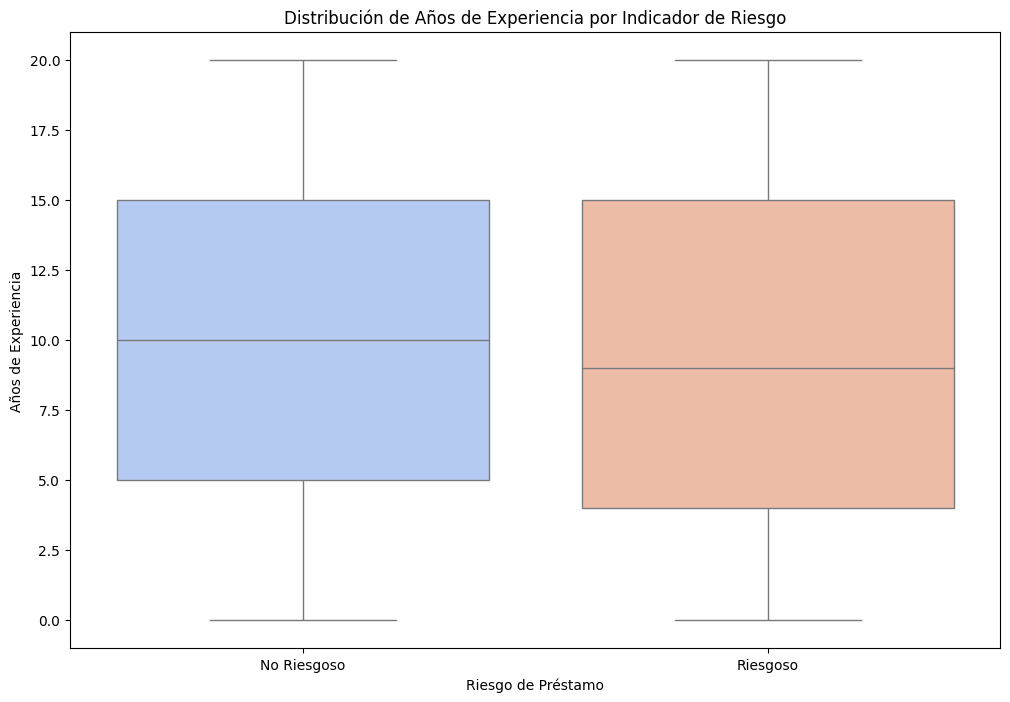

In [36]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Risk_Flag', y='Experience', data=df, palette='coolwarm')
plt.title('Distribución de Años de Experiencia por Indicador de Riesgo')
plt.xlabel('Riesgo de Préstamo')
plt.ylabel('Años de Experiencia')
plt.xticks([0, 1], ['No Riesgoso', 'Riesgoso'])
plt.show()

La distribución de los años de experiencia parece ser similar para ambos grupos, con una ligera tendencia hacia valores más altos en el grupo de solicitantes riesgosos.


No se observan valores atípicos evidentes en ninguno de los grupos.


El diagrama de cajas proporciona una información valiosa sobre la distribución de los años de experiencia por indicador de riesgo, pero no permite inferir relaciones causales entre las variables. Para realizar un análisis más profundo, se podrían utilizar otras técnicas estadísticas, como pruebas de hipótesis como la prueba Chi-cuadrado que permite evaluar si existe una asociación entre el indicador de riesgo y la distribución de los años de experiencia. La prueba te indicará si la frecuencia observada de años de experiencia en cada categoría de riesgo es diferente a la que se esperaría si no hubiera asociación entre las variables.

In [38]:
from scipy import stats
# Contar frecuencias de Años de Experiencia por Indicador de Riesgo
contingency_table = pd.crosstab(df['Experience'], df['Risk_Flag'])

# Realizar la prueba Chi-cuadrado
chi2_statistic, p_value, dof, expected = stats.chi2_contingency(contingency_table.values)

# Mostrar resultados
print("Chi-cuadrado:", chi2_statistic)
print("p-valor:", p_value)
print("Grados de libertad:", dof)


Chi-cuadrado: 915.3190749603384
p-valor: 4.312351857083535e-181
Grados de libertad: 20


## De acuerdo a los valores de la prueba Chi-cuadrado:

Chi-cuadrado: 915.319
- p-valor: 4.312351857083535e-181
- Grados de libertad: 20
- Podemos interpretar lo siguiente:

1. Evidencia de asociación: El valor del estadístico Chi-cuadrado (915.319) es muy alto, lo que indica una fuerte discrepancia entre las frecuencias observadas de Años de Experiencia en cada categoría de Indicador de Riesgo y las frecuencias esperadas bajo la hipótesis nula de independencia.

2. Significancia estadística: El valor p (4.312351857083535e-181) es extremadamente pequeño, incluso menor que el nivel de significancia más común (0.05). Esto significa que la probabilidad de observar una discrepancia tan grande como la observada, solo por azar, es prácticamente nula.

3. Rechazo de la hipótesis nula: En base al valor p tan pequeño, podemos rechazar la hipótesis nula de independencia con gran confianza. Esto significa que existe una asociación estadísticamente significativa entre los Años de Experiencia y el Indicador de Riesgo en tu conjunto de datos.

En otras palabras, los resultados de la prueba Chi-cuadrado proporcionan evidencia sólida de que la distribución de los Años de Experiencia no es la misma para los solicitantes riesgosos y no riesgosos. Es probable que los solicitantes con más años de experiencia tengan una mayor probabilidad de ser clasificados como riesgosos.

Distribución de Ingresos (Income)

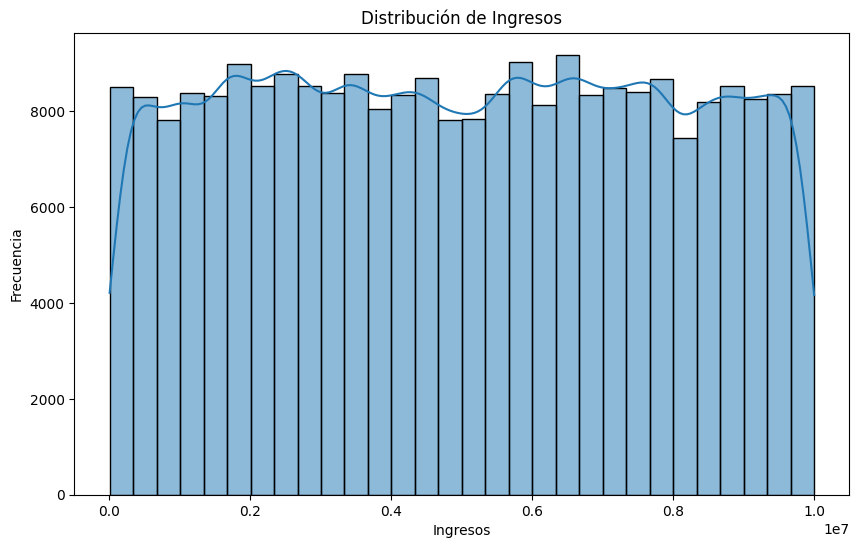

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que ya has cargado tu conjunto de datos en una variable llamada 'df'

# Configuración del tamaño de la figura
plt.figure(figsize=(10, 6))

# Creación del diagrama de densidad
sns.histplot(df['Income'], kde=True, bins=30)  # Ajusta el valor de 'bins' para controlar la suavidad de la curva

# Adición de etiquetas y título
plt.title('Distribución de Ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')

# Visualización del gráfico
plt.show()


Distribución de Edad (Age)

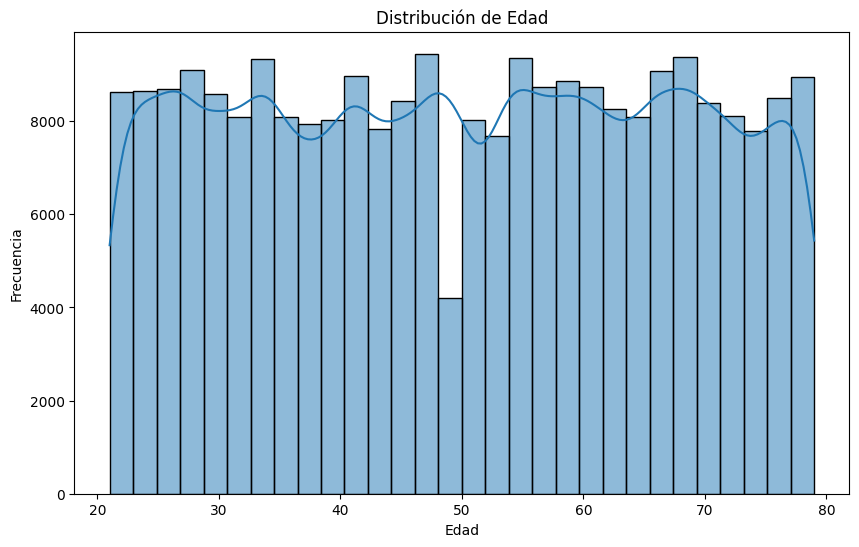

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

Relación entre Ingreso y Años de Experiencia

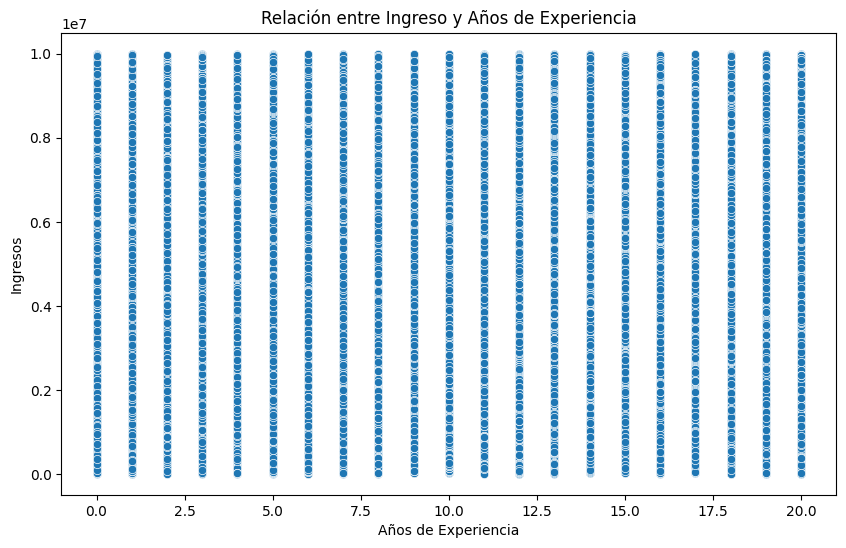

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Experience'], y=df['Income'])
plt.title('Relación entre Ingreso y Años de Experiencia')
plt.xlabel('Años de Experiencia')
plt.ylabel('Ingresos')
plt.show()


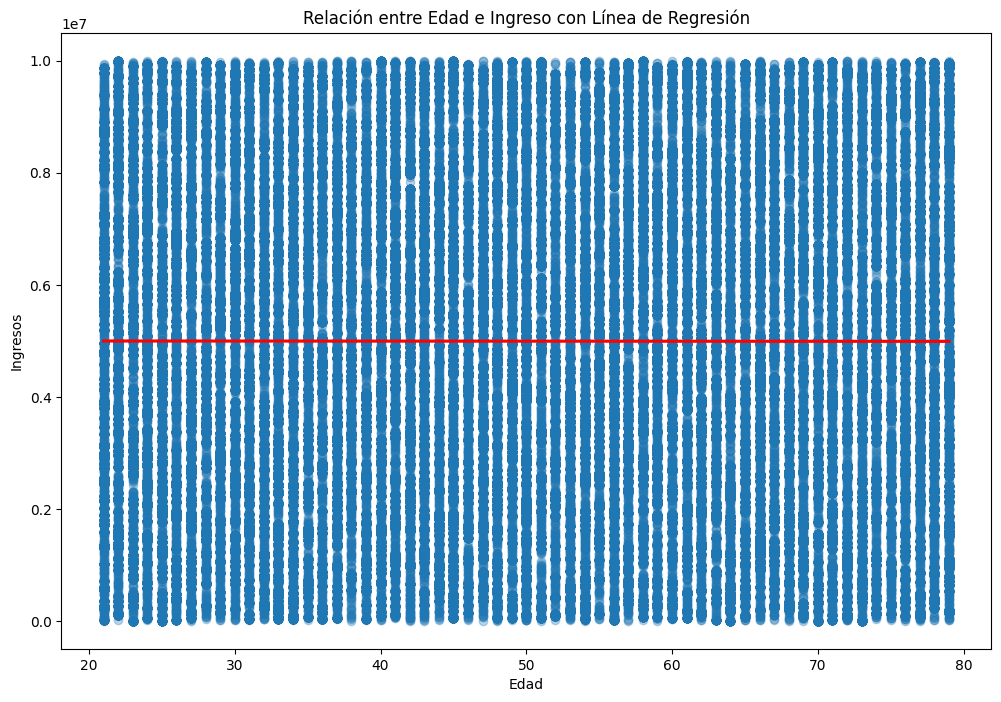

In [26]:
plt.figure(figsize=(12, 8))
sns.regplot(x='Age', y='Income', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Relación entre Edad e Ingreso con Línea de Regresión')
plt.xlabel('Edad')
plt.ylabel('Ingresos')
plt.show()


Distribución de Categorías de Ingreso

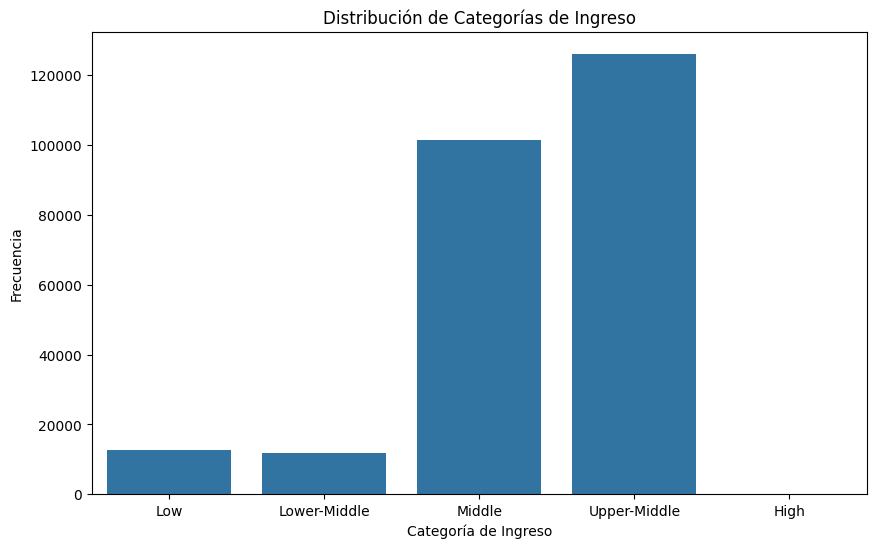

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Income_Category'])
plt.title('Distribución de Categorías de Ingreso')
plt.xlabel('Categoría de Ingreso')
plt.ylabel('Frecuencia')
plt.show()


Distribución de Grupos de Edad

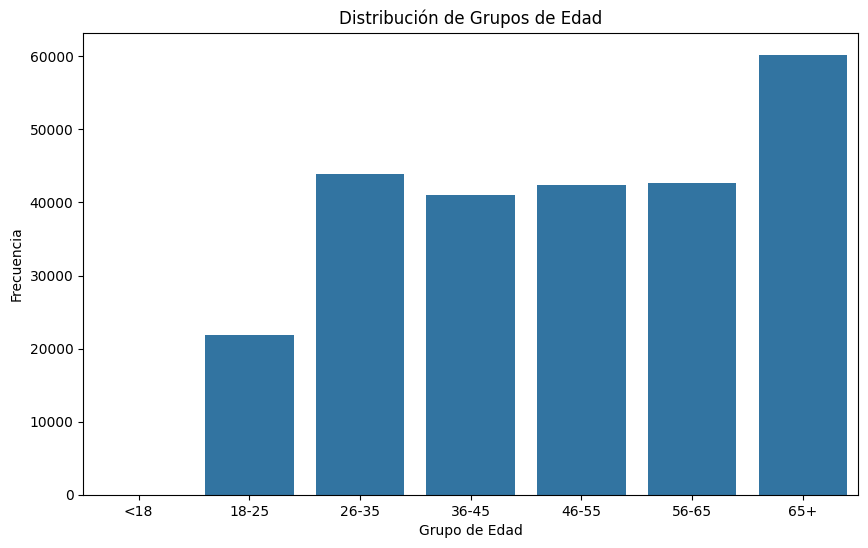

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Age_Group'])
plt.title('Distribución de Grupos de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Frecuencia')
plt.show()


nteracción entre Posesión de Casa y Carro

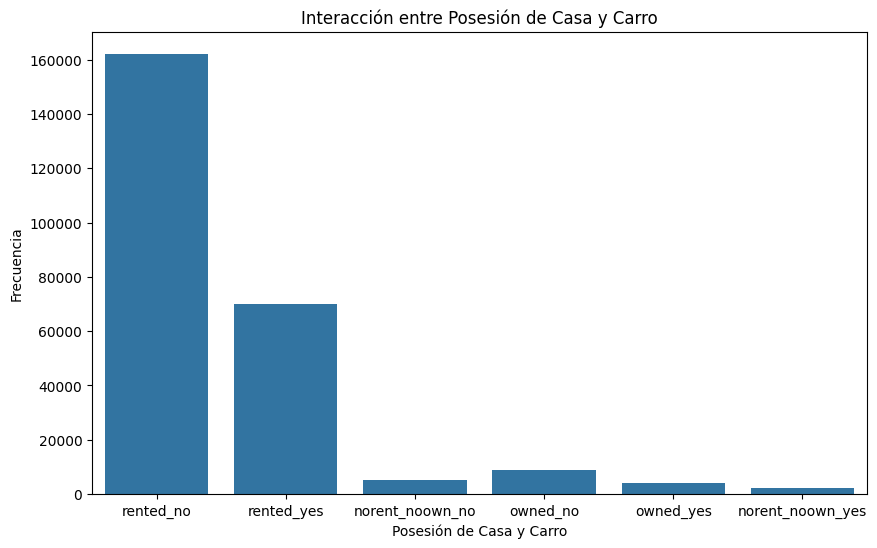

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['House_and_Car_Ownership'])
plt.title('Interacción entre Posesión de Casa y Carro')
plt.xlabel('Posesión de Casa y Carro')
plt.ylabel('Frecuencia')
plt.show()

Comparación de Ingreso por Profesión

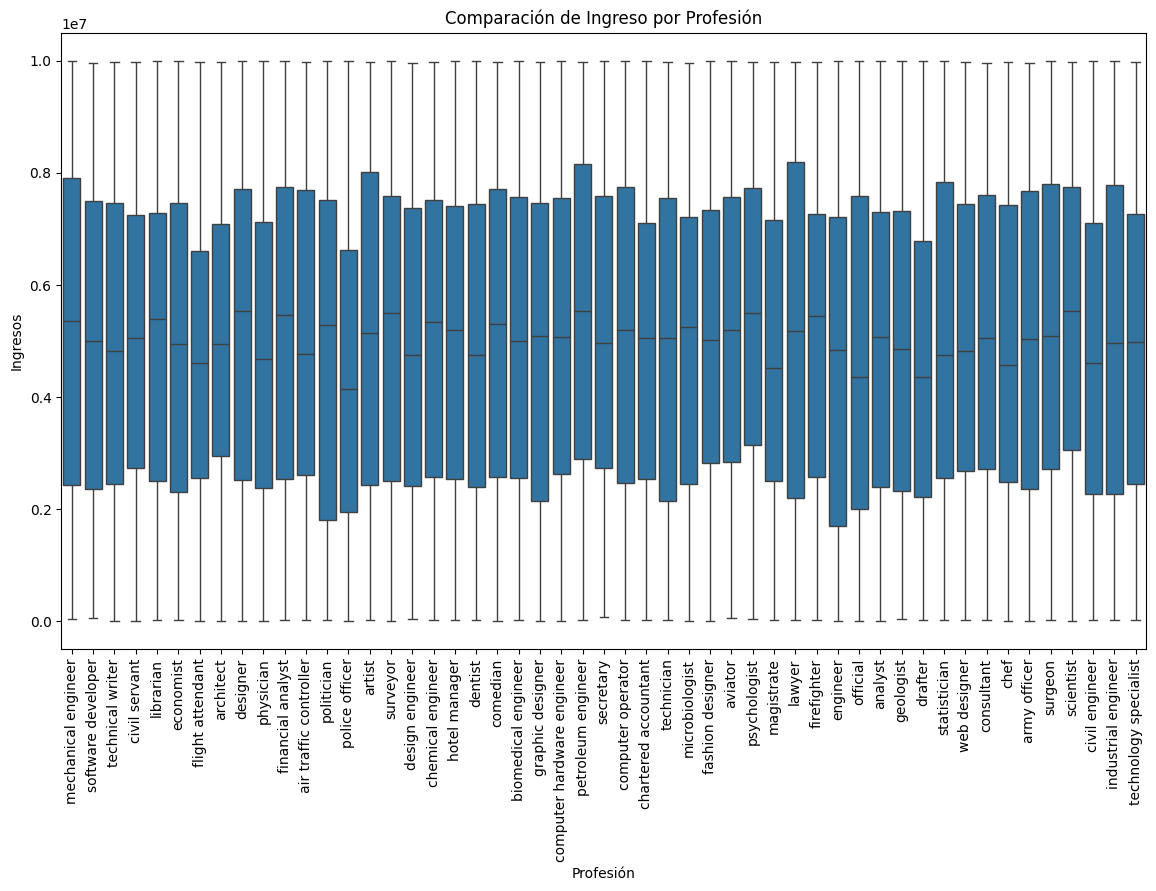

In [30]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Profession', y='Income', data=df)
plt.title('Comparación de Ingreso por Profesión')
plt.xlabel('Profesión')
plt.ylabel('Ingresos')
plt.xticks(rotation=90)
plt.show()

## **Análisis de la matriz de correlación**

La matriz de correlación proporciona una visión general de las relaciones lineales entre las variables del conjunto de datos. Los valores de correlación varían entre -1 y 1, donde:

Un valor de 1 indica una correlación positiva perfecta, lo que significa que las dos variables aumentan o disminuyen juntas en la misma proporción.
Un valor de -1 indica una correlación negativa perfecta, lo que significa que las dos variables se mueven en direcciones opuestas.
Un valor de 0 indica que no hay correlación lineal entre las dos variables.

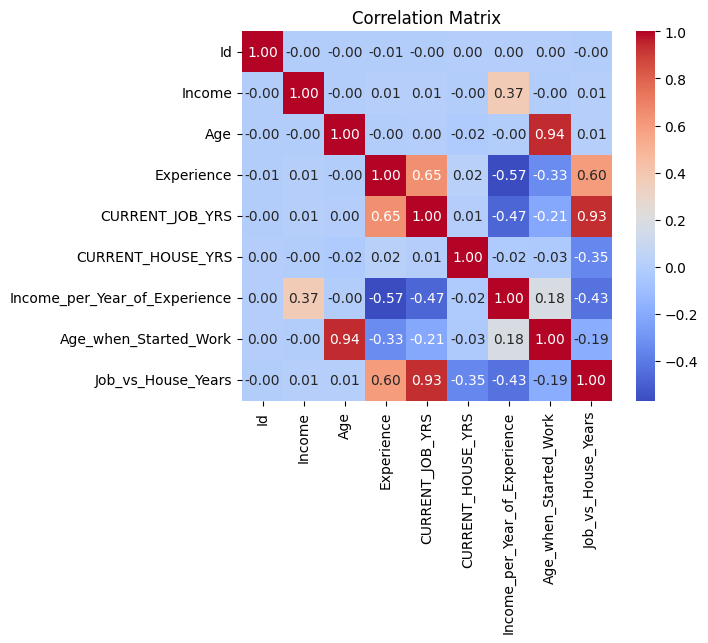

In [40]:
correlation_matrix = df.corr(numeric_only=True)

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

En la matriz de correlación proporcionada, podemos observar las siguientes relaciones:

- Ingreso y edad: Existe una correlación positiva moderada entre el ingreso y la edad (r = 0.37). Esto significa que, en general, a medida que las personas envejecen, tienden a tener mayores ingresos.
- Edad y experiencia: Existe una correlación positiva fuerte entre la edad y la experiencia (r = 0.94). Esto significa que, en general, las personas con más edad también tienen más experiencia laboral.
- Experiencia y años de trabajo actual: Existe una correlación positiva moderada entre la experiencia y los años de trabajo actual (r = 0.65). Esto significa que, en general, las personas con más experiencia laboral también han trabajado más años en su trabajo actual.
- Años de trabajo actual y años de casa actual: Existe una correlación positiva moderada entre los años de trabajo actual y los años de casa actual (r = 0.93). Esto significa que, en general, las personas que han trabajado más años en su trabajo actual también han vivido más años en su casa actual.
- Ingresos por año de experiencia: Existe una correlación positiva moderada entre los ingresos por año de experiencia y los ingresos (r = 0.37). Esto significa que, en general, las personas que ganan más ingresos por año de experiencia también tienen mayores ingresos generales.
- Edad al iniciar el trabajo: Existe una correlación positiva moderada entre la edad al iniciar el trabajo y la edad (r = 0.18). Esto significa que, en general, las personas que comenzaron a trabajar a una edad más temprana también son mayores en la actualidad.
- Trabajo vs años de vivienda: Existe una correlación negativa moderada entre el trabajo y los años de vivienda (r = -0.43). Esto significa que, en general, las personas que han trabajado más años en su trabajo actual también han vivido menos años en su casa actual.
## Conclusión

La matriz de correlación proporciona información valiosa sobre las relaciones entre las variables del conjunto de datos. Esta información puede ser útil para comprender mejor los factores que influyen en el riesgo crediticio. Por ejemplo, el hecho de que exista una correlación positiva entre el ingreso y la edad sugiere que las personas con mayores ingresos pueden ser menos riesgosas desde el punto de vista crediticio. Del mismo modo, el hecho de que exista una correlación positiva entre la experiencia y los años de trabajo actual sugiere que las personas con más experiencia laboral pueden ser menos riesgosas desde el punto de vista crediticio.

Sin embargo, es importante tener en cuenta que la correlación no implica causalidad. Solo porque dos variables estén correlacionadas no significa que una cause la otra.

## Tablas Resumen
Tabla de Estadísticas Descriptivas por Categoría de Ingreso

In [41]:
import pandas as pd
# Suponiendo que la tabla se encuentra en una variable llamada "df"
income_summary = df.groupby('Income_Category').describe().T
# Formateo de la tabla con Pandas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.precision', 2)  # Limitar la precisión a dos decimales
print(income_summary.to_string())



Income_Category                           Low  Lower-Middle    Middle  Upper-Middle  High
Id                            count  1.27e+04      1.18e+04  1.02e+05      1.26e+05   0.0
                              mean   1.26e+05      1.27e+05  1.26e+05      1.26e+05   NaN
                              std    7.26e+04      7.31e+04  7.27e+04      7.28e+04   NaN
                              min    7.90e+01      9.10e+01  1.00e+00      2.00e+00   NaN
                              25%    6.34e+04      6.32e+04  6.32e+04      6.28e+04   NaN
                              50%    1.26e+05      1.27e+05  1.26e+05      1.26e+05   NaN
                              75%    1.89e+05      1.91e+05  1.89e+05      1.89e+05   NaN
                              max    2.52e+05      2.52e+05  2.52e+05      2.52e+05   NaN
Income                        count  1.27e+04      1.18e+04  1.02e+05      1.26e+05   0.0
                              mean   2.60e+05      7.54e+05  2.98e+06      7.49e+06   NaN
          